# Imports

In [5]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Model load

In [6]:
path_qing_cheng = '../model/qing_cheng'
path_vallen = '../model/vallen'

qing_cheng_model_name = 'Qing-Cheng'
vallen_model_name = 'Vallen'

In [7]:
def get_file_paths(path: str):
    file_paths = []

    for dir_path, _, file_names in os.walk(path):
        file_path = {}
        
        for file_name in file_names:
            
            if file_name.endswith('.h5'):
                file_path['model'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('x.npy'):
                file_path['x'] = os.path.join(dir_path, file_name)
                
            elif file_name.endswith('y.npy'):
                file_path['y'] = os.path.join(dir_path, file_name)
                
        if len(file_path) > 0:
            file_paths.append(file_path)

    return file_paths

In [8]:
paths_qing_cheng = get_file_paths(path_qing_cheng)
paths_vallen = get_file_paths(path_vallen)

In [9]:
def load_model_result(path_dict: dict):
    model = load_model(path_dict['model'])
    x = np.load(path_dict['x'])
    y = np.load(path_dict['y'])
    
    y_predicted = model.predict(x)
    y_predicted_classes = np.argmax(y_predicted, axis=1)
    
    return {
        'model': model, 
        'x': x, 
        'y': y, 
        'y_predicted': y_predicted, 
        'y_predicted_classes': y_predicted_classes,
    }

In [10]:
qing_cheng_models = [load_model_result(path) for path in paths_qing_cheng]
vallen_models = [load_model_result(path) for path in paths_vallen]

282/282 [==============================] - 3s 9ms/step


# Plot

In [11]:
def plot_linear_regression(model_a:dict, model_a_name: str, model_b:dict, model_b_name:str, title:str):
    matrix_a = confusion_matrix(model_a['y'], model_a['y_predicted_classes'])
    matrix_b = confusion_matrix(model_b['y'], model_b['y_predicted_classes'])
    
    matrix_a_percent = matrix_a / matrix_a.sum(axis=1)[:, np.newaxis] * 100
    matrix_b_percent = matrix_b / matrix_b.sum(axis=1)[:, np.newaxis] * 100
    
    x = [25, 60, 95]
    
    y_a = np.diag(matrix_a_percent)[1:]
    y_b = np.diag(matrix_b_percent)[1:]
    
    coefficient_a = np.polyfit(x, y_a, 1)
    coefficient_b = np.polyfit(x, y_b, 1)
    
    polynomial_a = np.poly1d(coefficient_a)
    polynomial_b = np.poly1d(coefficient_b)
    
    y_fit_a = polynomial_a(x)
    y_fit_b = polynomial_b(x)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    ax1.set_ylim(78, 101)
    ax2.set_ylim(78, 101)
    
    ax1.set_xticks(np.arange(25, 100, 5))
    ax2.set_xticks(np.arange(25, 10, 5))
    
    ax1.plot(x, y_a, marker='o')
    ax1.plot(x, y_fit_a, color='#3498db', label='Curva Ajustada (Grau 2)', alpha=0.5)
    
    ax2.plot(x, y_b, marker='o')
    ax2.plot(x, y_fit_b, color='#3498db', label='Curva Ajustada (Grau 2)', alpha=0.5)
    
    ax1.set_title(f'{model_a_name}')
    ax2.set_title(f'{model_b_name}')
    
    plt.suptitle(title, y=1.05)
    
    plt.tight_layout()
    plt.show()

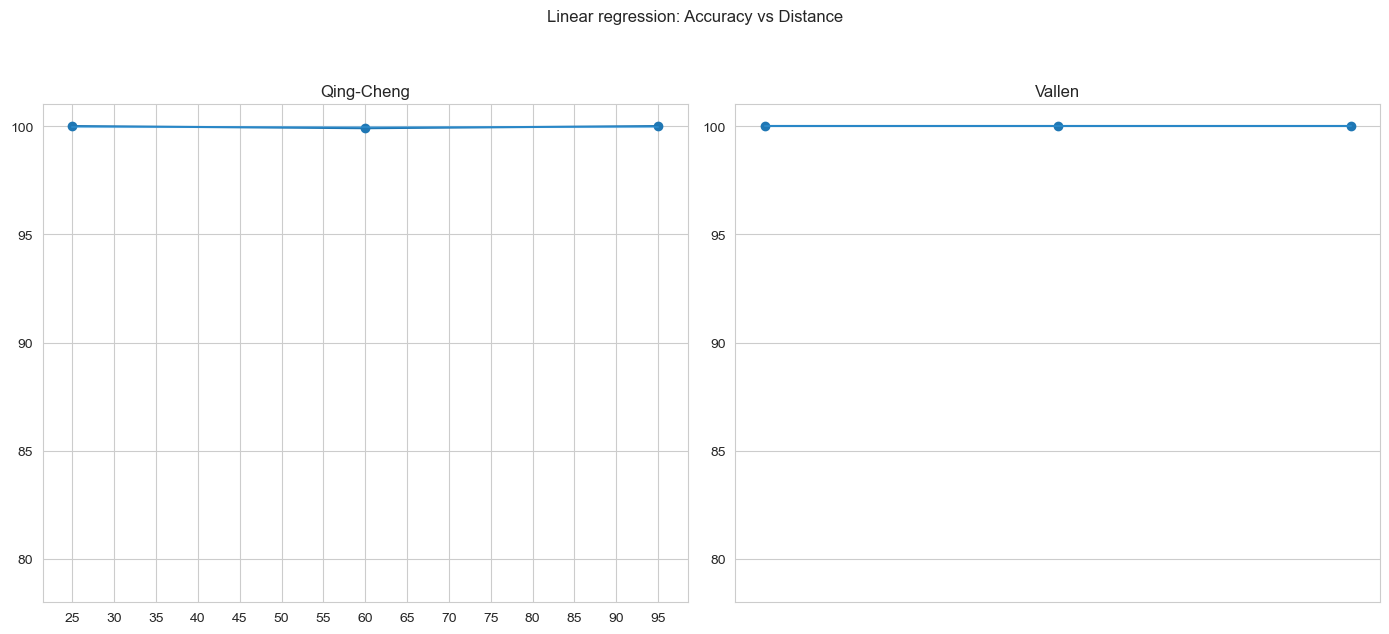

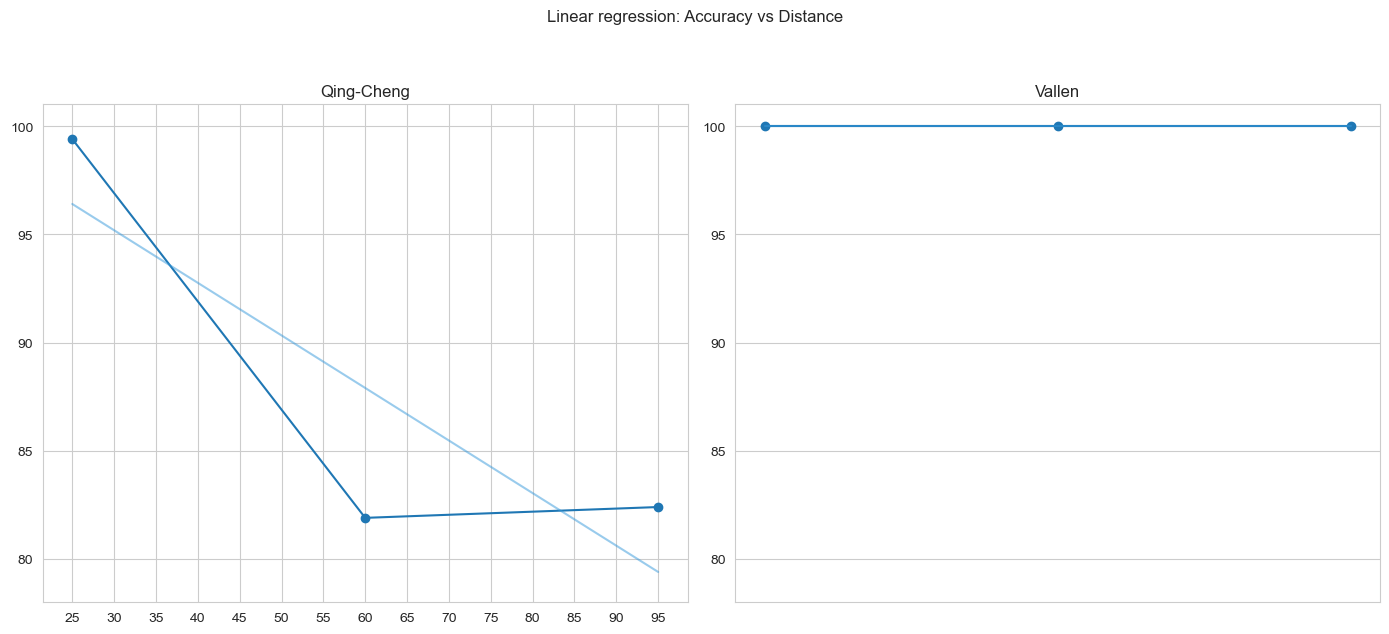

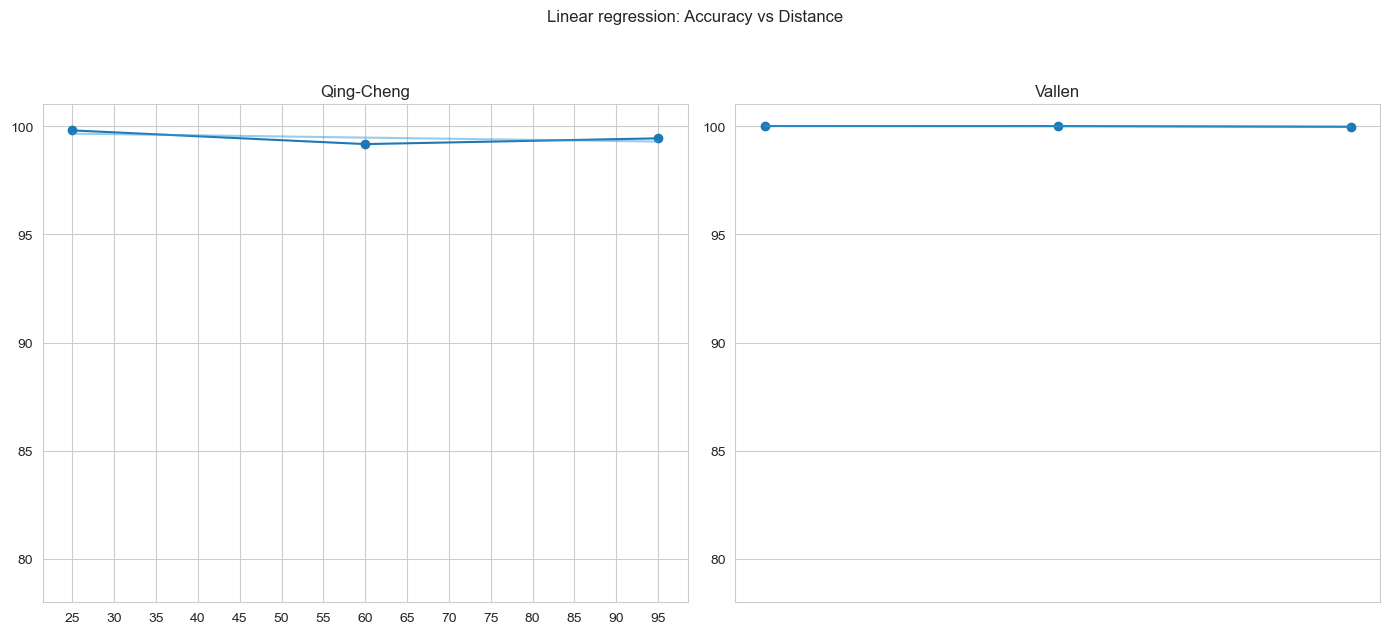

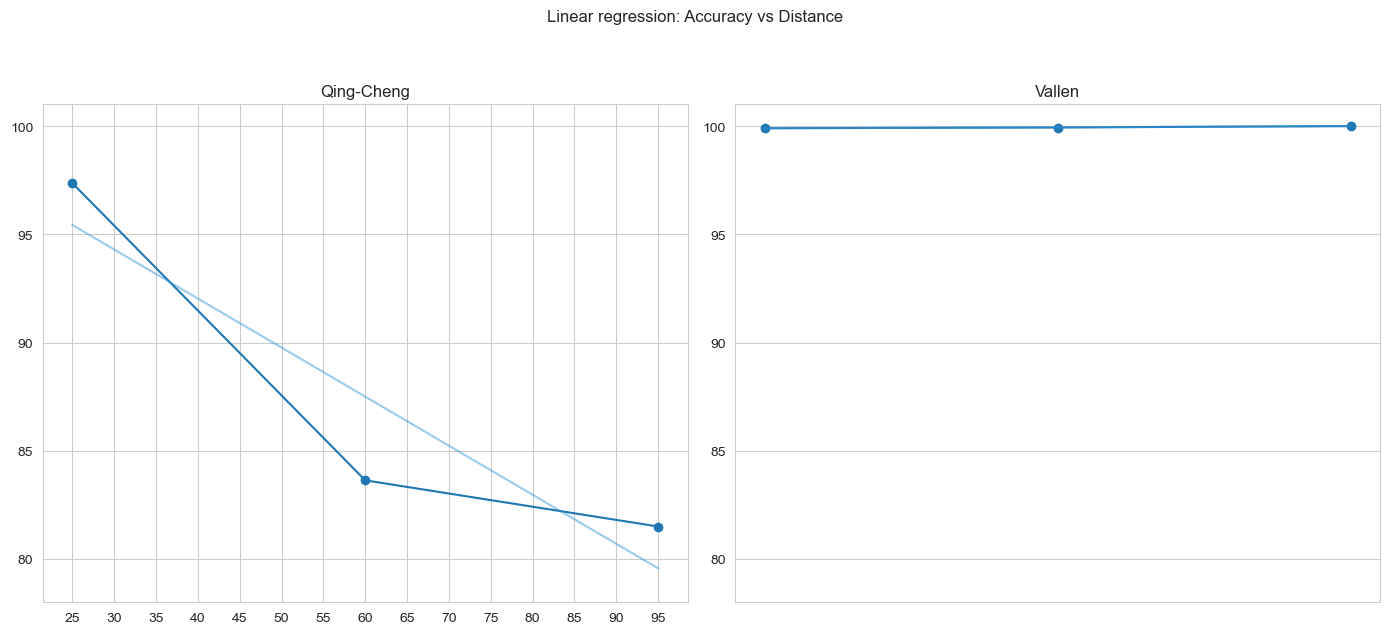

In [12]:
for index in range(4, 8):
    plot_linear_regression(
        qing_cheng_models[index],
        qing_cheng_model_name,
        vallen_models[index],
        vallen_model_name,
        'Linear regression: Accuracy vs Distance'
    )